In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img_array=cv2.imread("C:/Users/Pooja Yadav/Downloads/archive (2)/train/0/Training_99949469.jpg")

if img_array is not None:
    print(img_array.shape)
else:
    print("failed to load!")
    

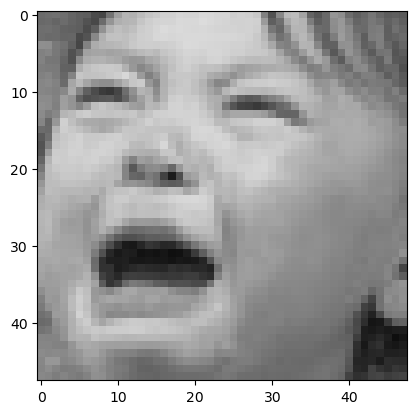

In [7]:
plt.imshow(img_array)

In [9]:
Datadirectory="C:/Users/Pooja Yadav/Downloads/archive (2)/train/"

In [11]:
Classes=["0", "1","2", "3", "4", "5", "6"]

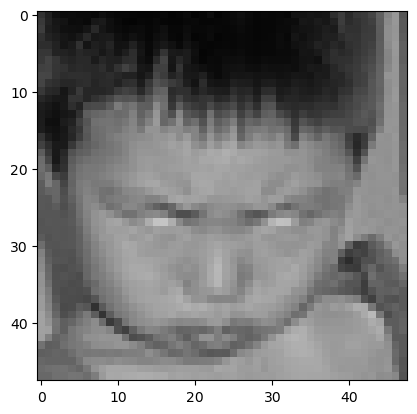

In [13]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break     

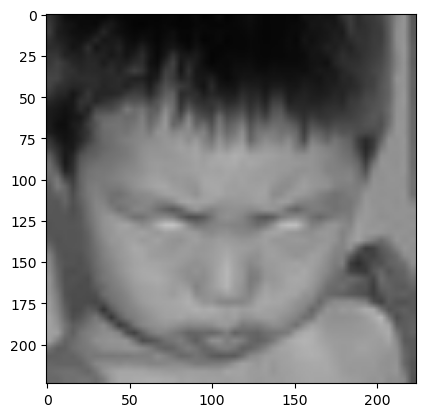

In [15]:
img_size=224
new_array=cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [17]:
new_array.shape

(224, 224, 3)

In [19]:
img_size=224
training_Data =[]

def create_training_data():
    for category in Classes:
        path=os.path.join(Datadirectory, category)
        class_num=Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass

In [21]:
create_training_data()

In [23]:
print(len(training_Data))

28709


In [25]:
import random

random.shuffle(training_Data)

In [27]:
X= []
y= []

for features, label in training_Data:
    X.append(features)
    y.append(label)

X=np.array(X).reshape(-1,img_size, img_size,3) ### converting in 4d 

In [29]:
X.shape

(28709, 224, 224, 3)

In [31]:
y[0]

0

In [33]:
Y=np.array(y)

In [35]:
Y.shape

(28709,)

In [37]:

from sklearn.model_selection import train_test_split


# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [39]:
new_model.fit(X_train, Y_train, epochs=20, validation_data=(X_test, Y_test))


NameError: name 'new_model' is not defined

In [ ]:
# Evaluate on test data
test_loss, test_accuracy = new_model.evaluate(X_test, Y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


In [38]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [39]:
input_shape=(224,224,3)

In [43]:
model = tf.keras.applications.MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')

In [44]:
model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [47]:
x = model.output 
x = tf.keras.layers.GlobalAveragePooling2D()(x) # Pooling to reduce dimensions 
x = tf.keras.layers.Dense(128, activation='relu')(x) 
x = tf.keras.layers.Dense(64, activation='relu')(x) 
predictions = tf.keras.layers.Dense(len(Classes), activation='softmax')(x) # Output layer 

# Create the new model 
new_model = tf.keras.Model(inputs=model.input, outputs=predictions) 

# Compile the model 
new_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 
new_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,430,663 (9.27 MB)

 Trainable params: 2,396,551 (9.14 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [49]:
base_input=model.layers[0].input

base_output=model.layers[-2].output
base_output

final_output=layers.Dense(128)(base_output)
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(64)(final_output)
final_output=layers.Activation('relu')(final_output)
final_output=layers.Dense(7,activation='softmax')(final_output)

final_output
new_model2=keras.Model(inputs =base_output,outputs=final_output)
new_model2.summary()
new_model2.compile(loss="sparse_categorial_crossentropy" , optimizer="adam", metrics=["accuracy"])


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ keras_tensor_152CLONE (InputLayer)   │ (None, 7, 7, 1280)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7, 7, 128)           │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 7, 7, 64)            │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7, 7, 7)             │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 172,679 (674.53 KB)

 Trainable params: 172,679 (674.53 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
new_model.fit(X,Y, epochs=1)

898/898 ━━━━━━━━━━━━━━━━━━━━ 2839s 3s/step - accuracy: 0.4826 - loss: 1.3743


In [51]:
new_model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))


Epoch 1/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 2571s 4s/step - accuracy: 0.4580 - loss: 1.4098 - val_accuracy: 0.3595 - val_loss: 4.4474
Epoch 2/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 2166s 3s/step - accuracy: 0.5850 - loss: 1.0967 - val_accuracy: 0.2478 - val_loss: 3.9617
Epoch 3/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 2206s 3s/step - accuracy: 0.6310 - loss: 0.9990 - val_accuracy: 0.3910 - val_loss: 1.8903
Epoch 4/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 2545s 4s/step - accuracy: 0.6547 - loss: 0.9363 - val_accuracy: 0.3600 - val_loss: 2.1705
Epoch 5/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 2637s 4s/step - accuracy: 0.6793 - loss: 0.8690 - val_accuracy: 0.4371 - val_loss: 2.0380
Epoch 6/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 2822s 4s/step - accuracy: 0.6957 - loss: 0.8213 - val_accuracy: 0.3509 - val_loss: 2.5341
Epoch 7/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 2822s 4s/step - accuracy: 0.7171 - loss: 0.7601 - val_accuracy: 0.4107 - val_loss: 2.1073
Epoch 8/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 2800s 4s/step - accuracy: 0.7343 - loss: 0.7216 - 

In [53]:
# Evaluate on test data
test_loss, test_accuracy = new_model.evaluate(X_test, Y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


180/180 - 150s - 831ms/step - accuracy: 0.3804 - loss: 2.1361
Test Accuracy: 38.04%


In [55]:
# Assuming X_test and Y_test are your test data and true labels
Y_pred = new_model.predict(X_test)


180/180 ━━━━━━━━━━━━━━━━━━━━ 128s 680ms/step


In [57]:
import numpy as np

Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true_classes = Y_test  # Assuming Y_test is already in label form


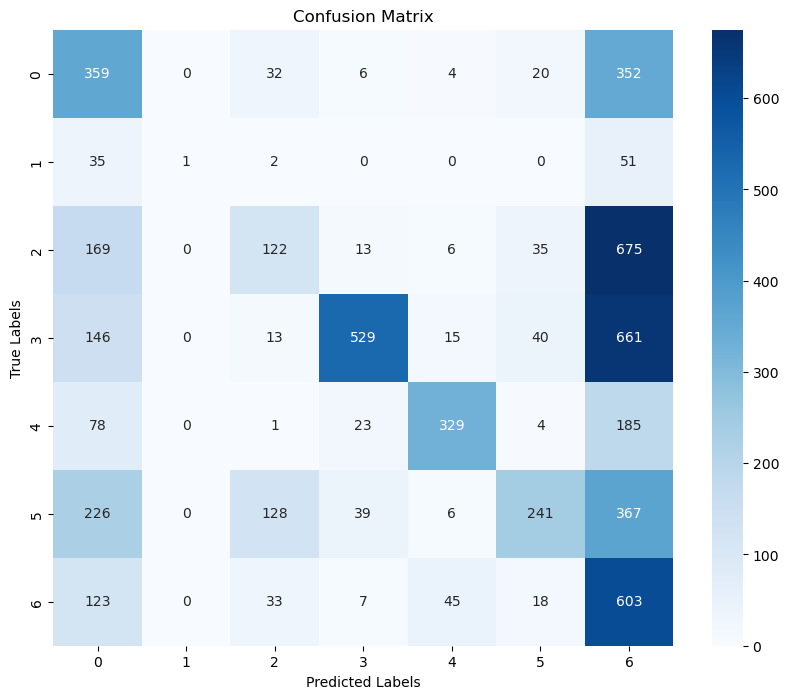

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix
conf_matrix = confusion_matrix(Y_true_classes, Y_pred_classes)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=Classes, yticklabels=Classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


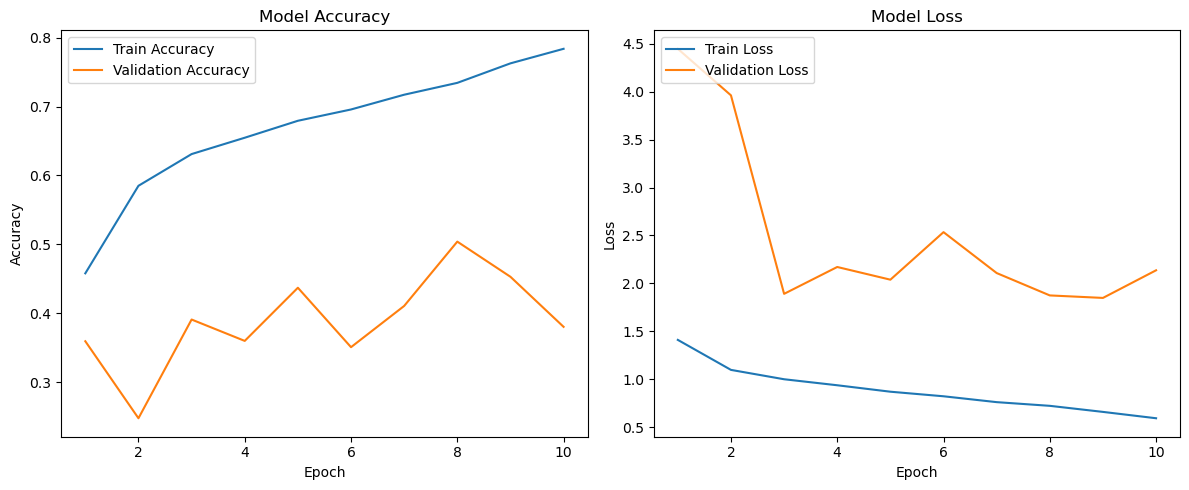

In [73]:
epochs = range(1, 11)
train_accuracies = [0.4580, 0.5850, 0.6310, 0.6547, 0.6793, 0.6957, 0.7171, 0.7343, 0.7626, 0.7837]
val_accuracies = [0.3595, 0.2478, 0.3910, 0.3600, 0.4371, 0.3509, 0.4107, 0.5040, 0.4530, 0.3804]
train_losses = [1.4098, 1.0967, 0.9990, 0.9363, 0.8690, 0.8213, 0.7601, 0.7216, 0.6583, 0.5920]
val_losses = [4.4474, 3.9617, 1.8903, 2.1705, 2.0380, 2.5341, 2.1073, 1.8738, 1.8477, 2.1361]
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [75]:
new_model.save('my_model.keras')

In [76]:
load_model =tf.keras.models.load_model('my_model.keras')

In [79]:
new_model.evaluate ## test data

<bound method TensorFlowTrainer.evaluate of <Functional name=functional, built=True>>

In [81]:
## download any emotion photo and chcek
frame=cv2.imread("C://Users/Pooja Yadav/Downloads/archive (2)/happyimage.jpg")


In [83]:
frame.shape


(1280, 1052, 3)

In [63]:
frame1.shape

(1280, 1169, 3)

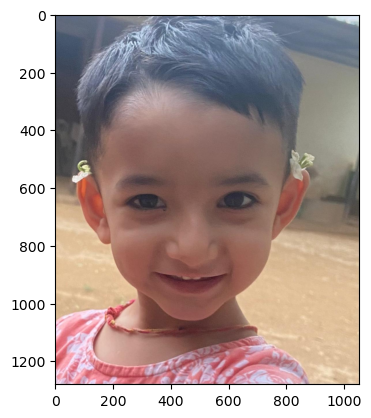

In [85]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))




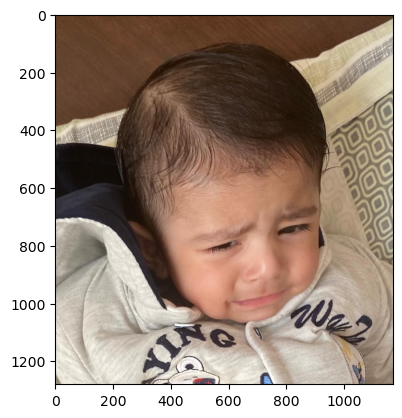

In [67]:
plt.imshow(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB))

In [87]:
## we need face detection algoithm (work on grwy images)
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


In [89]:
gray=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [91]:
gray.shape

(1280, 1052)

In [75]:
gray2=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
gray2.shape

(1280, 1052)

In [93]:
faces=faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray=gray[y:y+h , x:x+w]
    roi_color =frame[y:y+h , x:x+w]
    cv2.rectangle(frame, (x,y),(x+w, y+h), (255,0,0),2)
    faces=faceCascade.detectMultiScale(roi_gray)
    if len(faces)==0:
        print("Facenot dtetcted")
    else:
        for (ex,ey,ew,eh) in faces:
            face_roi=roi_color[ey:ey+eh, ex:ex+ew]

In [79]:
faces=faceCascade.detectMultiScale(gray2,1.1,4)
for x,y,w,h in faces:
    roi_gray=gray2[y:y+h , x:x+w]
    roi_color =frame1[y:y+h , x:x+w]
    cv2.rectangle(frame1, (x,y),(x+w, y+h), (255,0,0),2)
    faces=faceCascade.detectMultiScale(roi_gray)
    if len(faces)==0:
        print("Facenot dtetcted")
    else:
        for (ex,ey,ew,eh) in faces:
            face_roi1=roi_color[ey:ey+eh, ex:ex+ew]

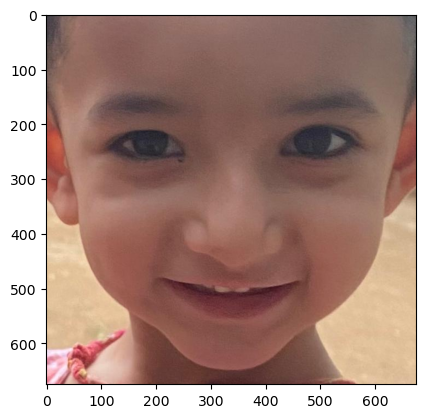

In [95]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

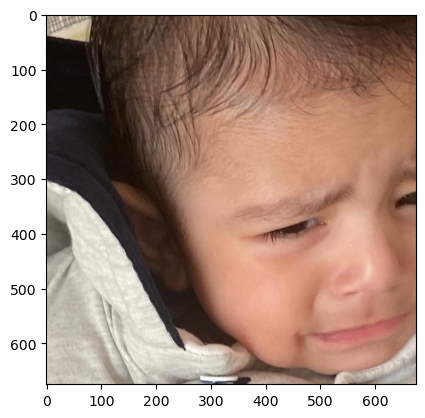

In [83]:
plt.imshow(cv2.cvtColor(face_roi1, cv2.COLOR_BGR2RGB))

In [97]:
final_image=cv2.resize(face_roi, (224,224))
final_image=np.expand_dims(final_image, axis=0)
final_image=final_image/255.0



In [ ]:
final_image1=cv2.resize(face_roi1, (224,224))
final_image1=np.expand_dims(final_image1, axis=0)
final_image1=final_image1/255.0

In [99]:
Predictions=new_model.predict(final_image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [89]:
Predictions1=new_model.predict(final_image1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


In [101]:
Predictions[0]


array([9.4168973e-01, 6.2724392e-10, 4.1820236e-02, 1.3494524e-02,
       2.4328558e-06, 7.3123723e-04, 2.2617090e-03], dtype=float32)

In [93]:
Predictions1[0]

array([6.7165330e-02, 7.8593266e-06, 7.3181465e-02, 3.8936699e-03,
       7.7616793e-01, 4.4191595e-02, 3.5392210e-02], dtype=float32)

In [103]:
np.argmax(Predictions)

0

In [97]:
np.argmax(Predictions1)

4

In [ ]:
import cv2

path="haarcascade_frontalface_default.xml"
font_scale=1.5
font=cv2.FONT_HERSHEY_PLAIN

rectangle_bgr=(255,255,255)

img=np.zeros((500,500))
text="Some text in a box"
(text_width, text_height)=cv2.getTextSize(text,font, fontScale=font_scale, thickness=1)[0]
text_offset_x=10
text_offset_y=img.shape[0]-25

box_coords=((text_offset_x,text_offset_y),(text_offset_x +text_width+2,text_offset_y-text_height-2))
cv2.rectangle(img, box_coords[0],box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale,color=(0, 0, 0), thickness=1)

cap=cv2.VideoCapture(1)

if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open camera")
    
while True:
    ret,frame=cap.read()
    faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
    gray=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces= faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray=gray[y:y+h , x:x+w]
        roi_color=frame[y:y+h , x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0),2)
        facess=faceCascade.detectMultiScale(roi_gray)
        if len(facess)==0:
            print("face not detected")

        else:
            for( ex,ey,ew,eh) in facess:
                face_roi=roi_color[ey:ey+eh , ex: ex+ew]

            final_image=cv2.resize(face_roi,(224,224))
            final_image=np.expand_dims(final_image, axis=0)
            final_image=final_image/255.0

            font=cv2.FONT_HERSHEY_SIMPLEX
            Predictions =new_model.predict(final_image)

            font_image=1.5
            font=cv2.FONT_HERSHEY_PLAIN

    if (np.argmax(Predictions)==0):
         status ="Angry"

         x1,y1,w1,h1=0,0,175,75

         cv2.rectangle(frame,(x1,x1),(x1+w1, y1+h1), (0,0,0),-1)

         cv2.putText(frame, status, (x1 +int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
         cv2.putText(frame, status,(100,150), font, 3,(0,0,255),2,cv2.LINE_4)
         cv2.rectangle(frame, (x,y),(x+w, y+h),(0,0,255))
    elif (np.argmax(Predictions)==1):
         status="Disgust"

         x1,y1,w1,h1=0,0,175,75

         cv2.rectangle(frame,(x1,x1),(x1+w1, y1+h1), (0,0,0),-1)

         cv2.putText(frame, status, (x1 +int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
         cv2.putText(frame, status,(100,150), font, 3,(0,0,255),2,cv2.LINE_4)
         cv2.rectangle(frame, (x,y),(x+w, y+h),(0,0,255))

    elif (np.argmax(Predictions)==2):
         status="Sad"

         x1,y1,w1,h1=0,0,175,75

         cv2.rectangle(frame,(x1,x1),(x1+w1, y1+h1), (0,0,0),-1)

         cv2.putText(frame, status, (x1 +int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
         cv2.putText(frame, status,(100,150), font, 3,(0,0,255),2,cv2.LINE_4)
         cv2.rectangle(frame, (x,y),(x+w, y+h),(0,0,255))

    elif (np.argmax(Predictions)==3):
         status="Happy"

         x1,y1,w1,h1=0,0,175,75

         cv2.rectangle(frame,(x1,x1),(x1+w1, y1+h1), (0,0,0),-1)

         cv2.putText(frame, status, (x1 +int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
         cv2.putText(frame, status,(100,150), font, 3,(0,0,255),2,cv2.LINE_4)
         cv2.rectangle(frame, (x,y),(x+w, y+h),(0,0,255))

    elif (np.argmax(Predictions)==4):
         status="Surprise"

         x1,y1,w1,h1=0,0,175,75

         cv2.rectangle(frame,(x1,x1),(x1+w1, y1+h1), (0,0,0),-1)

         cv2.putText(frame, status, (x1 +int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
         cv2.putText(frame, status,(100,150), font, 3,(0,0,255),2,cv2.LINE_4)
         cv2.rectangle(frame, (x,y),(x+w, y+h),(0,0,255))

    elif (np.argmax(Predictions)==5):
         status="Neutral"

         x1,y1,w1,h1=0,0,175,75

         cv2.rectangle(frame,(x1,x1),(x1+w1, y1+h1), (0,0,0),-1)

         cv2.putText(frame, status, (x1 +int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
         cv2.putText(frame, status,(100,150), font, 3,(0,0,255),2,cv2.LINE_4)
         cv2.rectangle(frame, (x,y),(x+w, y+h),(0,255,0))



    cv2.imshow('Face emotion recognition' , frame)
    if cv2.waitKey(2) & 0xFF==ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
         
    
    



                                                                                    

face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
face not detected
face not detected
face not detected
face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
face not detected
face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
face not detected
face not detected
face not detected
face not detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1